![](pic_3.jpg)

# Business case study : LoanTap - Logisitic Regression


**About LoanTap-**

    LoanTap is an online platform committed to delivering customized loan products to millennials. 
    
    They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms 
    
    to salaried professionals and businessmen.

    LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

        1) Personal Loan
        
        2) EMI Free Loan
        
        3) Personal Overdraft
        
        4) Advance Salary Loan
        
    This case study will focus on the underwriting process behind Personal Loan only
    

**Business Problem-**

    Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
    
    If so, what should the repayment terms be in business recommendations?
        

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, RocCurveDisplay


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


_**Upload & read csv file in pandas dataframe**_ -
    

In [2]:
loan = pd.read_csv("logistic_regression.csv")


In [3]:
loan.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
loan.tail()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


------------------------------------------------------------------------------------------------

**Observations on -**

    1) shape of data
    
    2) data types
    
    3) Statistical summary
    



In [5]:
loan.shape


(396030, 27)


    Dataset contains 396030 rows and 27 columns.
    

In [6]:
loan.size


10692810

In [7]:
loan.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
loan.nunique()


loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [9]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
loan.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [11]:
loan.describe(include = "object")


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


-----------------------------------------------------------------------------------------------

**Data type Conversion -**

In [12]:
# Changing the data type of some columns (string to date-time format)
loan['issue_d'] = pd.to_datetime(loan['issue_d'])

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'])


----------------------------------------------------------------------------------------------


**Data Exploration -**


In [13]:
# Term -
loan["term"].value_counts()


 36 months    302005
 60 months     94025
Name: term, dtype: int64

    Comments -
    
        We have 5 year term as maximum.
        

In [14]:
# Home Ownership -
loan["home_ownership"].value_counts()


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

    Comments -
    
        Here, there is majority of Mortgage and rent home_ownership.
        
        We will merge "None" and "Any" Type to "Other" column.
        

In [15]:
loan.loc[(loan["home_ownership"] == 'ANY') | (loan["home_ownership"] == 'NONE'), 'home_ownership'] = 'OTHER'  
loan.home_ownership.value_counts()


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

---------------------------------------------------------------------------------------------


**Univariate, Bivariate & Multivariate Analysis -**


<Axes: xlabel='loan_status', ylabel='count'>

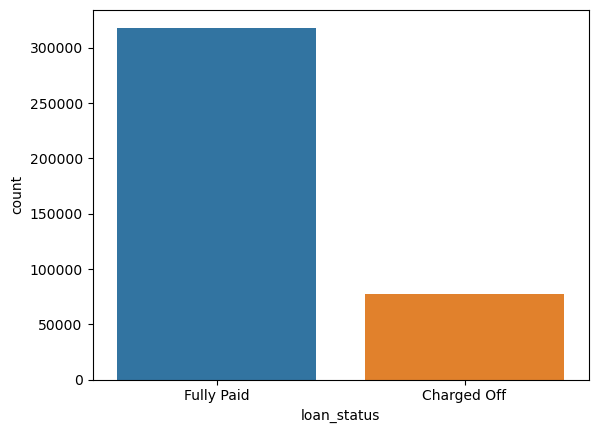

In [16]:
# Loan status (Target Variable)
sns.countplot(x = loan['loan_status'])


    Comments -

        this data is biased to catagary fully paid in loan status,

        so by default this model will work more efficient on fully paid category, 

        and less in status charged off.

        we can apply SMOTE here to handle imbalance data problem while creating logistic regression model.


**Distribution Plot (KDE Plot) - Continuous Variables**


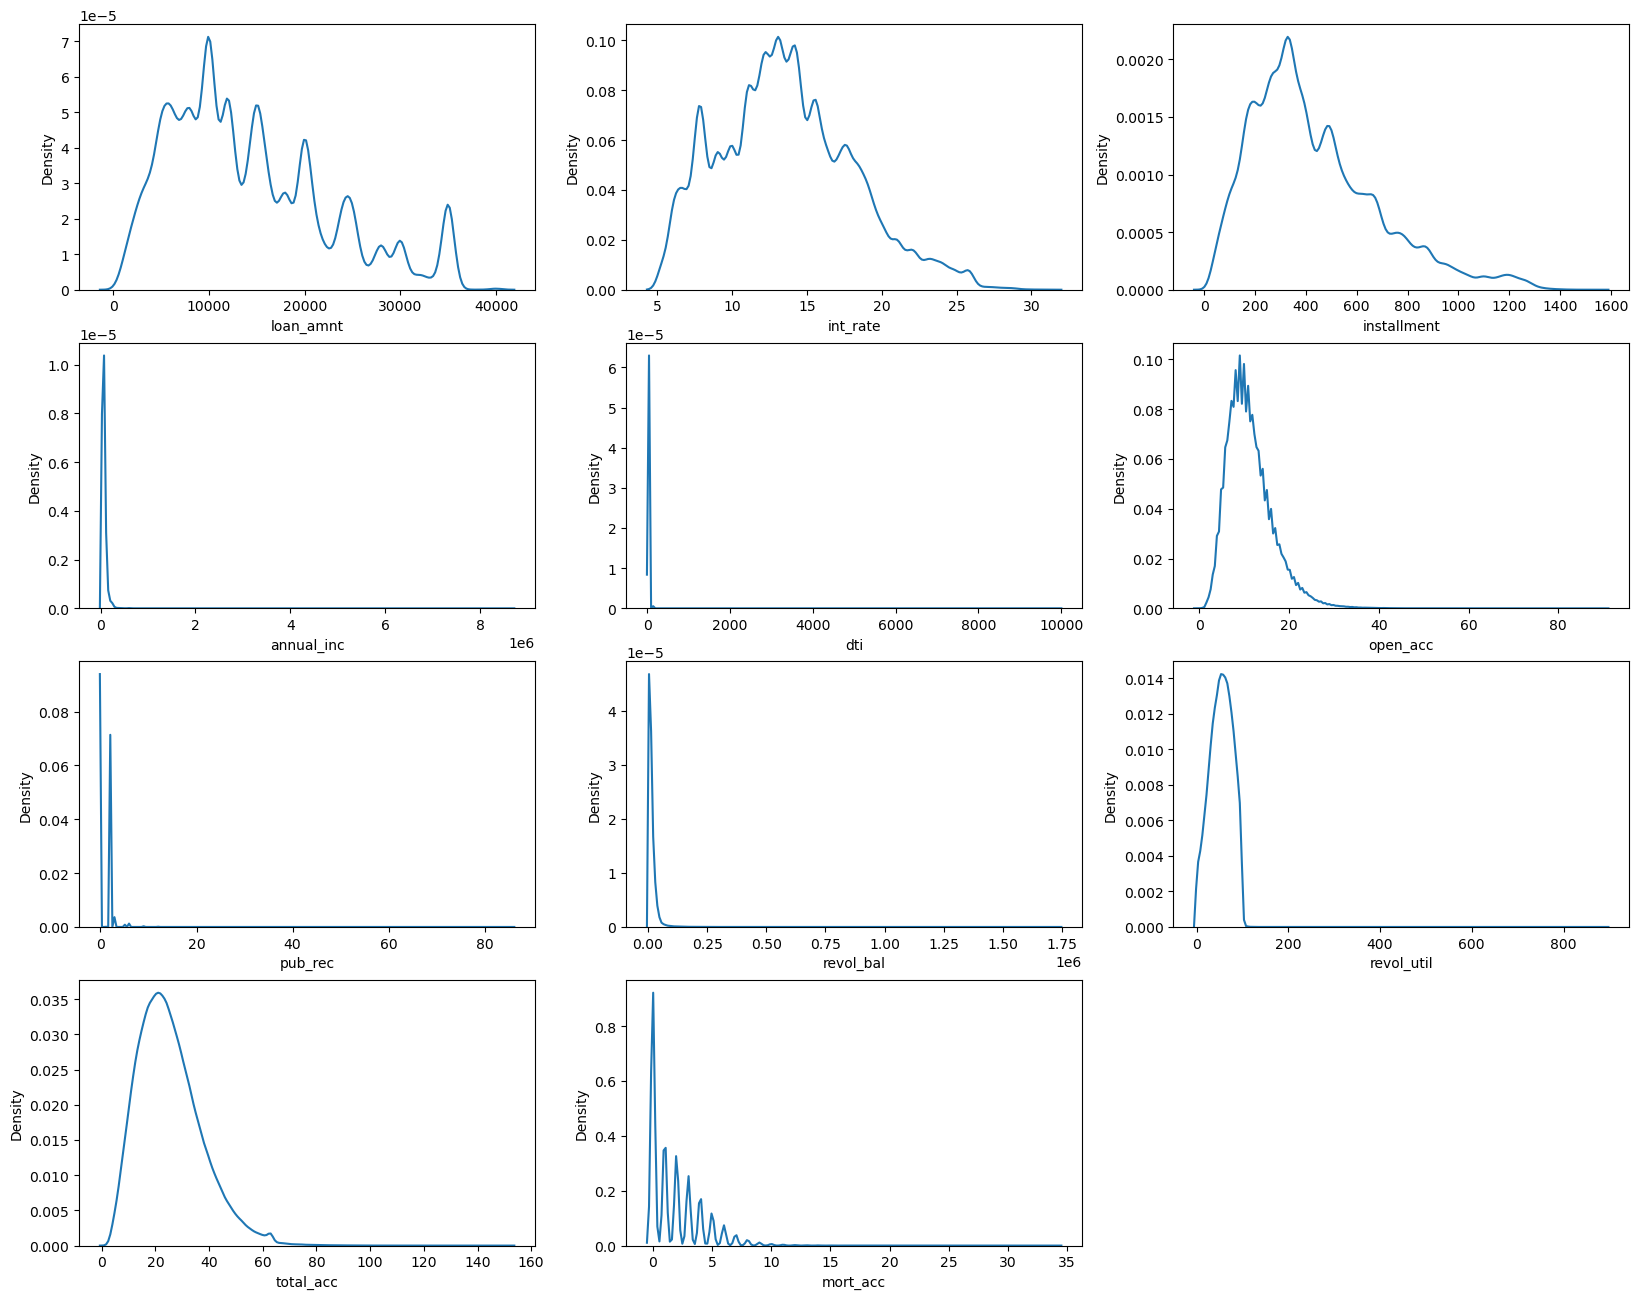

In [17]:
kde_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util', 'total_acc', 'mort_acc']

count = 1
plt.figure(figsize = (20,20))

for col in kde_plot:
  plt.subplot(5,3, count)
  sns.kdeplot(x = loan[col])
  count = count + 1

plt.show()



    Comments -
    
        From above kde plots, most of the col are right skewed. 
        
        So, we need to standardise the columns before making logistic regression model.
        

**Count Plots (Important categorical features) -**


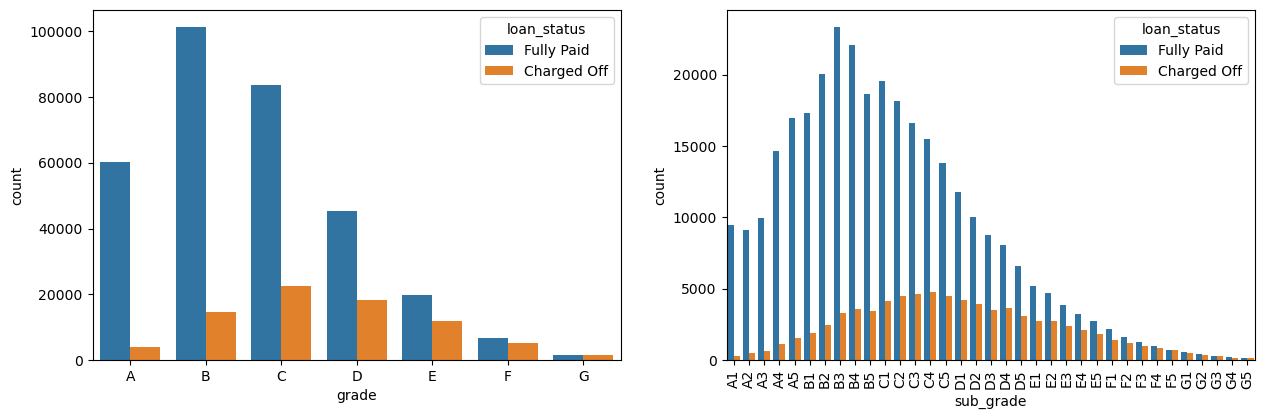

In [18]:
# Grade & Sub Grade w.r.t Loan status (Target feature)-
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
grade = sorted(loan["grade"].unique().tolist())
sns.countplot(x = 'grade', data = loan, hue ='loan_status', order = grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loan["sub_grade"].unique().tolist())
g = sns.countplot(x = 'sub_grade', data = loan, hue = 'loan_status', order = sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.show()


    Comments -
    
        From above graph, we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.
        

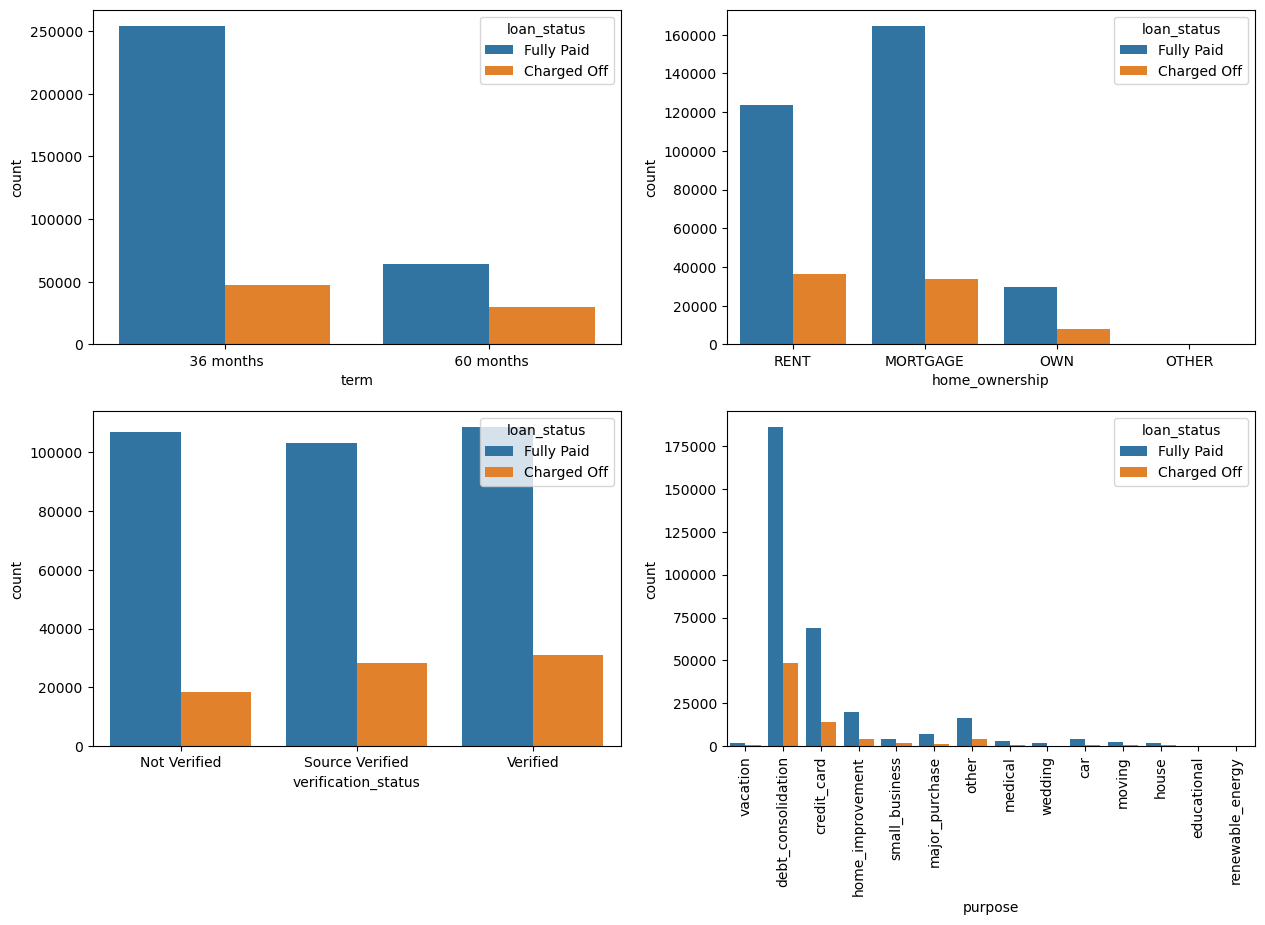

In [19]:
# Term, Home ownership, Verification status, Purpose w.r.t Loan status(Target feature) -
plt.figure(figsize = (15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'term', data = loan, hue = 'loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x = 'home_ownership', data = loan, hue = 'loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x = 'verification_status', data = loan, hue = 'loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x = 'purpose', data = loan, hue = 'loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.show()


    Comments -
    
        1) "Term" Feature  - people prefer 36 months loan term
        
        2) "Home_ownership" Feature  - Mortgage count is high amongst all the categories
        
        3) "verification status" Feature - There is not significant difference in all categories of verification
        
        4) "Purpose" Feature - Debt consolidation purpose of loan is highest in count.
        

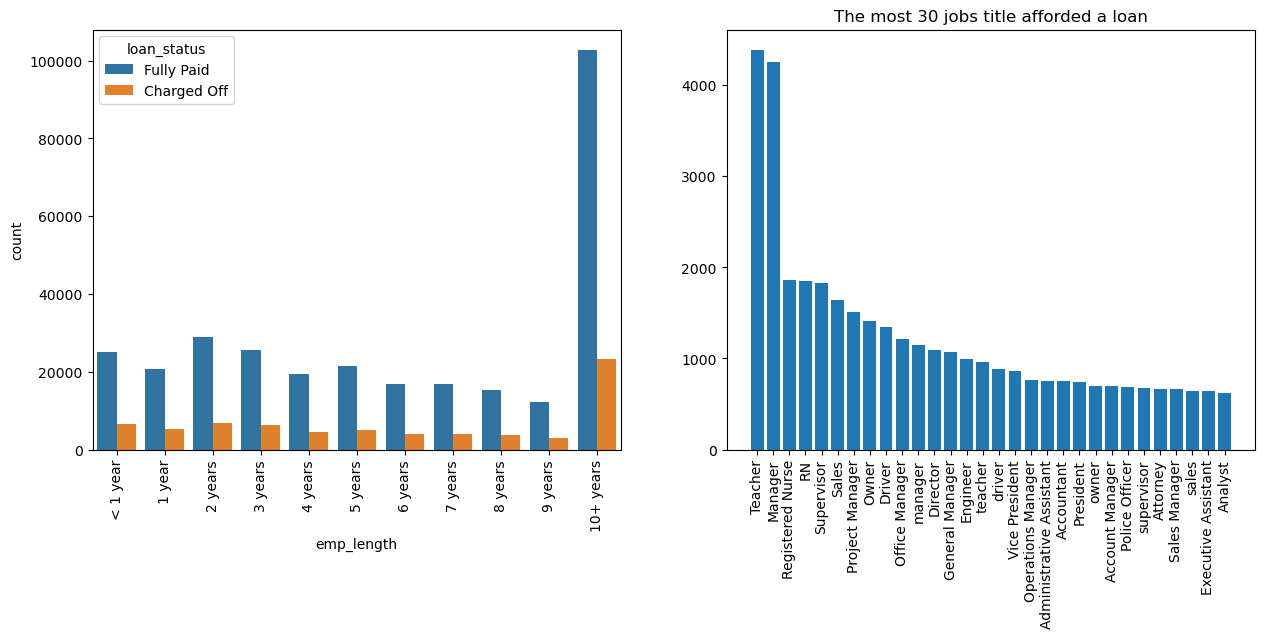

In [20]:
# Employee length, Employee title w.r.t Loan status(Target Feature) -
plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x = 'emp_length', data = loan, hue = 'loan_status', order = order)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.subplot(2, 2, 2)
plt.bar(loan["emp_title"].value_counts()[:30].index, loan["emp_title"].value_counts()[:30])
plt.xticks(rotation = 90)
plt.title("The most 30 jobs title afforded a loan")
plt.show()


    Comments -
    
        1) "Employee Length" Feature  - Employee length greater than 10 years are higher in loan disbursement
        
        2) "Job Title" Feature  - Teacher is the category which is getting loan in highest count.
        

In [21]:
# For features like Public records, Mortgage accounts & public record bankruptcies, we have lot of outliers
# & we don't want to loose data, hence we will convert number greater than 1 to 1.

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    

In [22]:
loan['pub_rec'] = loan["pub_rec"].apply(pub_rec)

loan['mort_acc'] = loan["mort_acc"].apply(mort_acc)

loan['pub_rec_bankruptcies'] = loan["pub_rec_bankruptcies"].apply(pub_rec_bankruptcies)


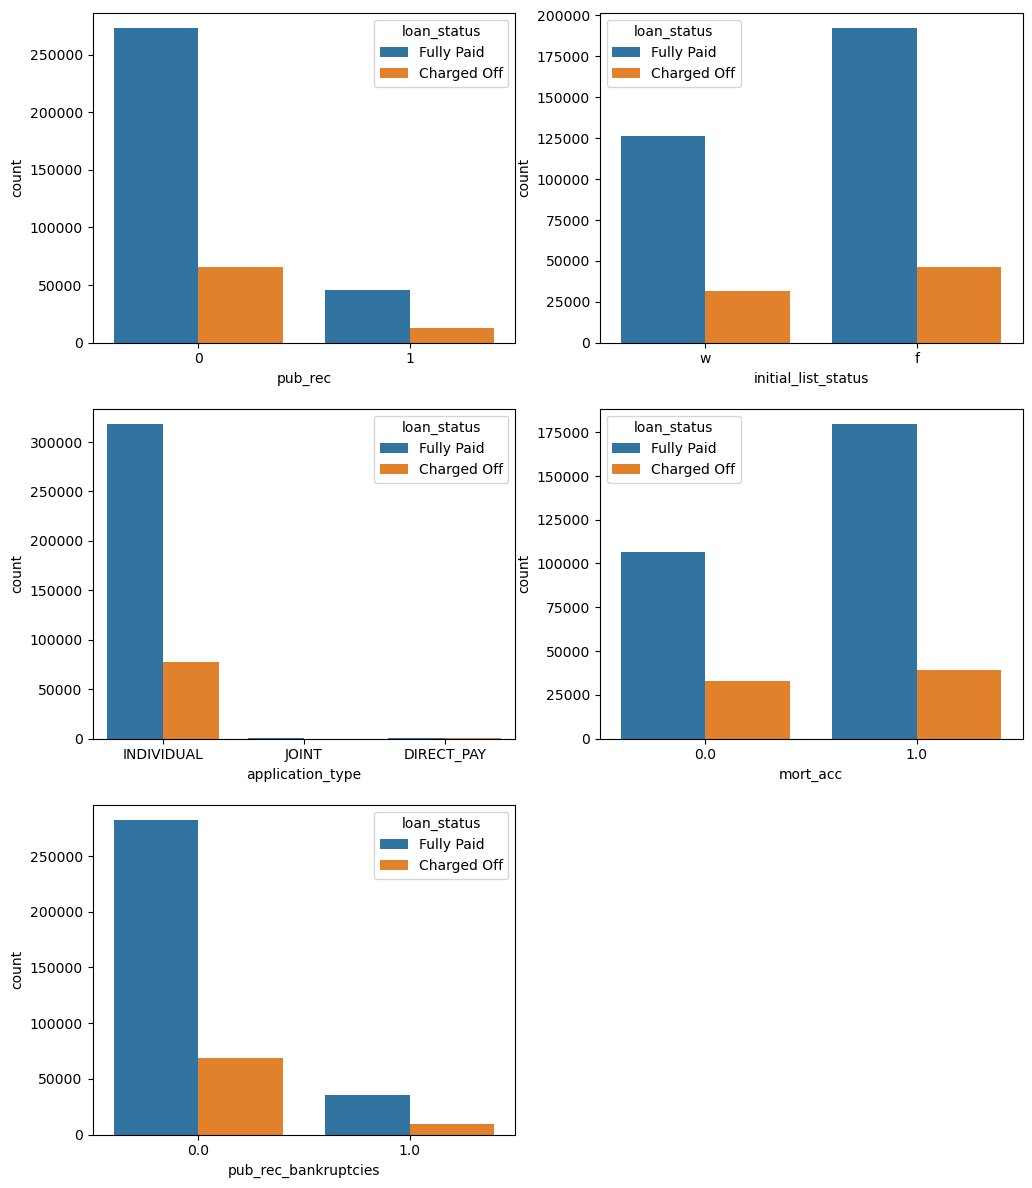

In [23]:
plt.figure(figsize = (12,30))

plt.subplot(6, 2, 1)
sns.countplot(x = 'pub_rec', data = loan, hue = 'loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x = 'initial_list_status', data = loan, hue = 'loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x = 'application_type', data = loan, hue = 'loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x = 'mort_acc', data = loan, hue = 'loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x = 'pub_rec_bankruptcies', data = loan, hue = 'loan_status')

plt.show()


**Boxplot -**


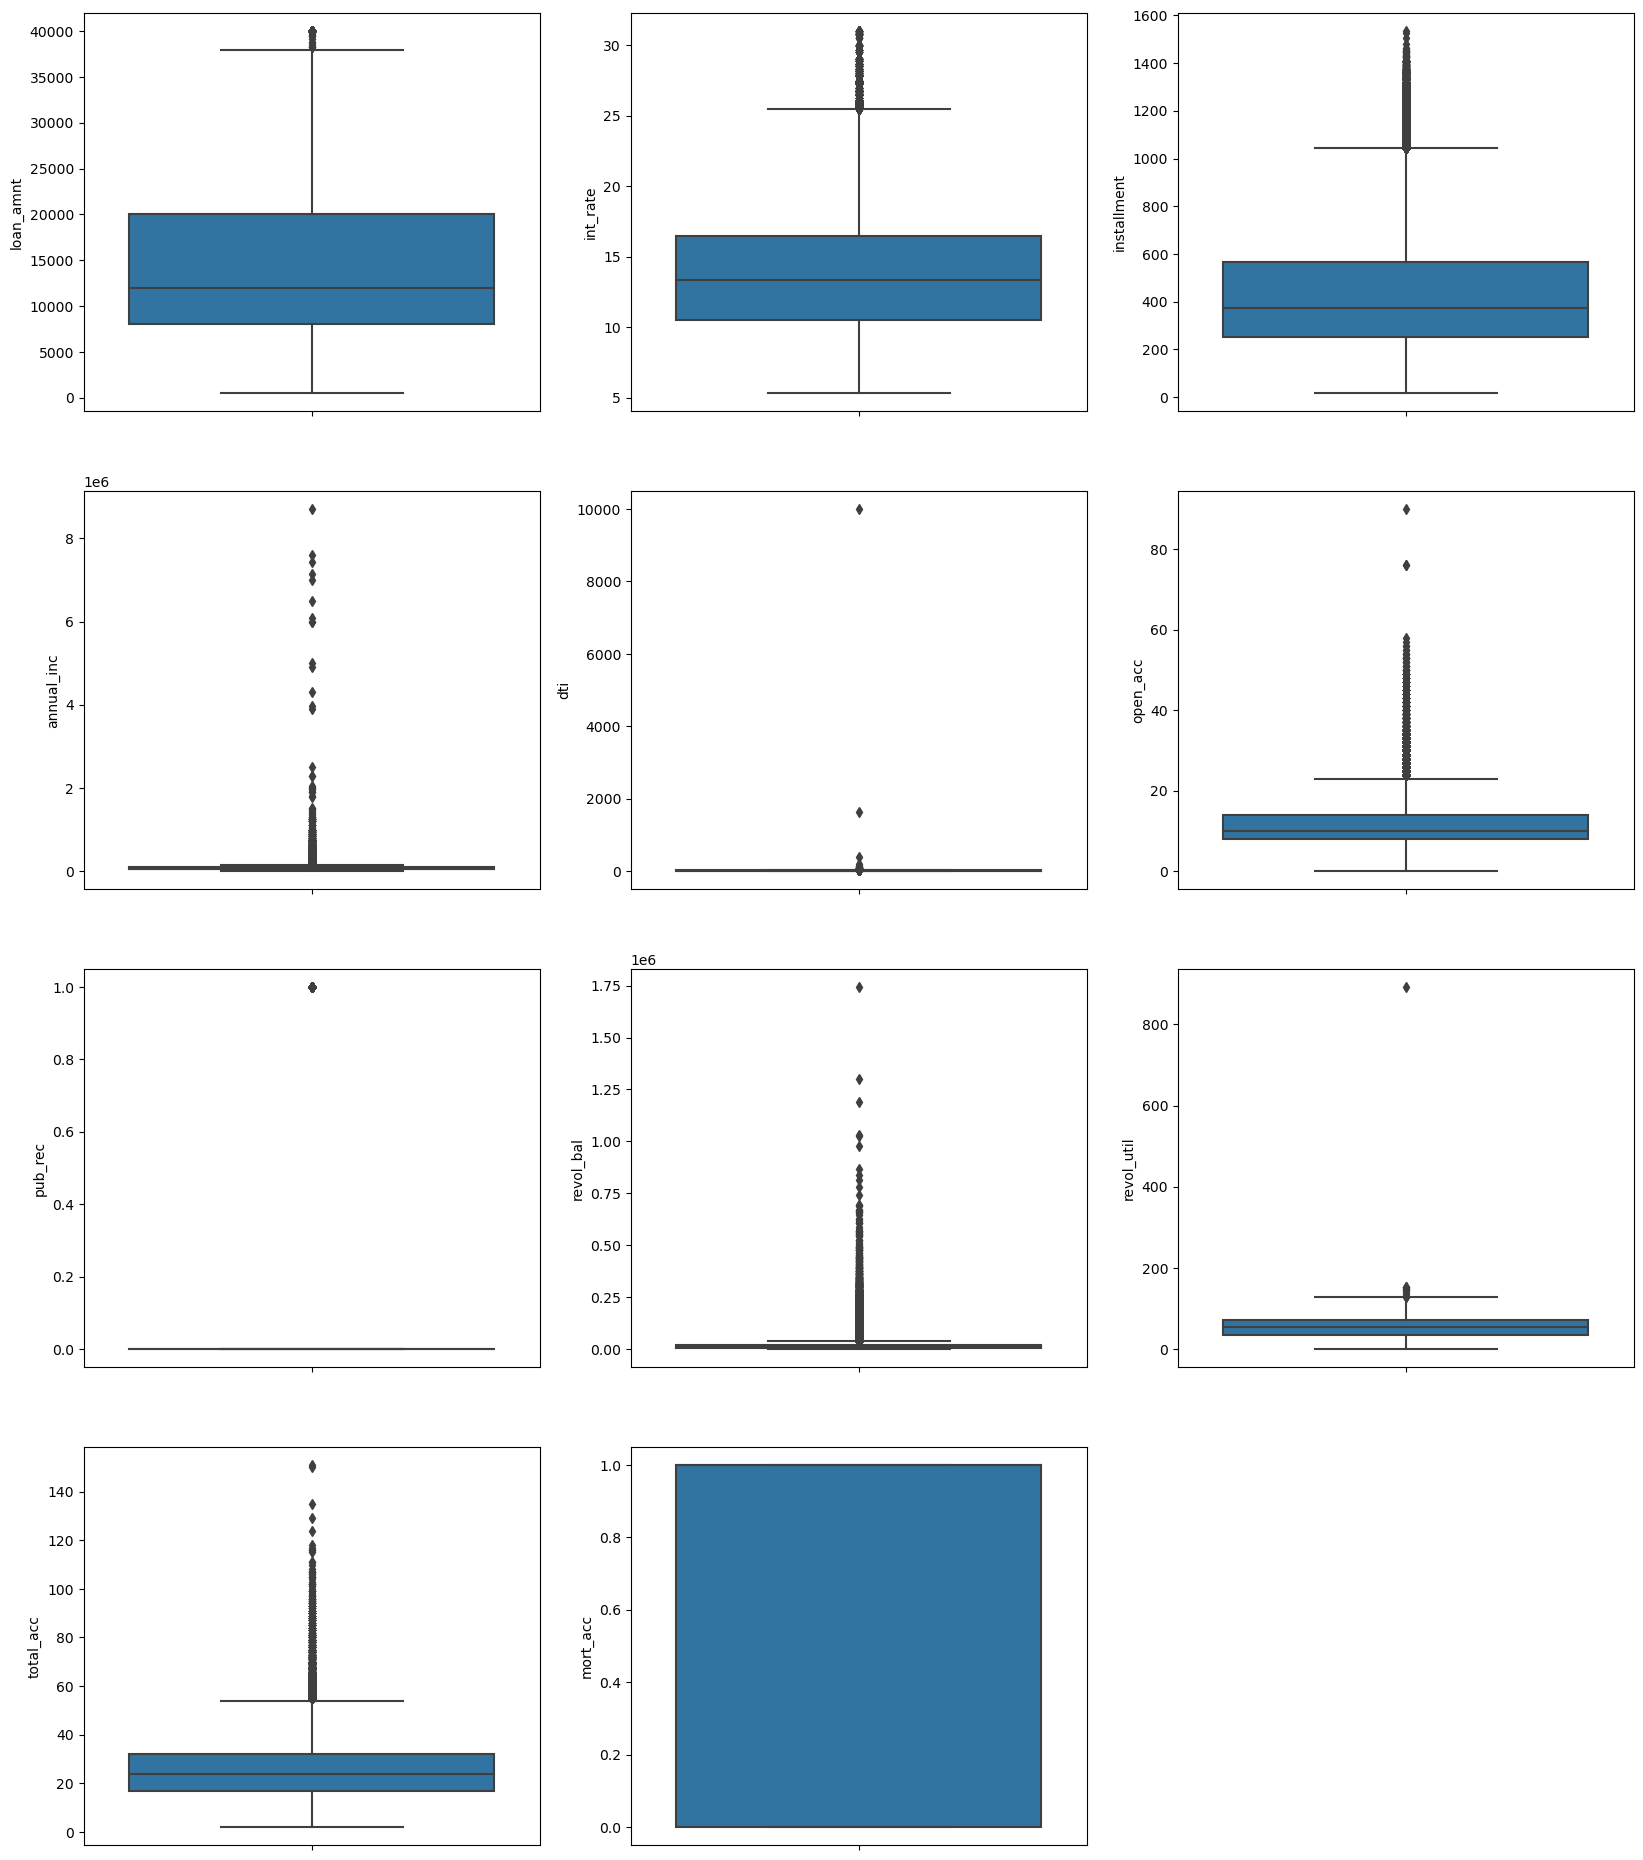

In [24]:
box_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti','open_acc',
           'pub_rec', 'revol_bal','revol_util', 'total_acc', 'mort_acc']

count = 0

plt.figure(figsize = (20, 30))

for i in box_plot:
    count = count + 1
    plt.subplot(5, 3, count)
    sns.boxplot(y = loan[i])
    
plt.show()
    

    Comments -
    
        from this Box plot, we came to know that we have a lot of out liers that need to be treated.
    
    

**Heatmap - (To check correlation among different features)**


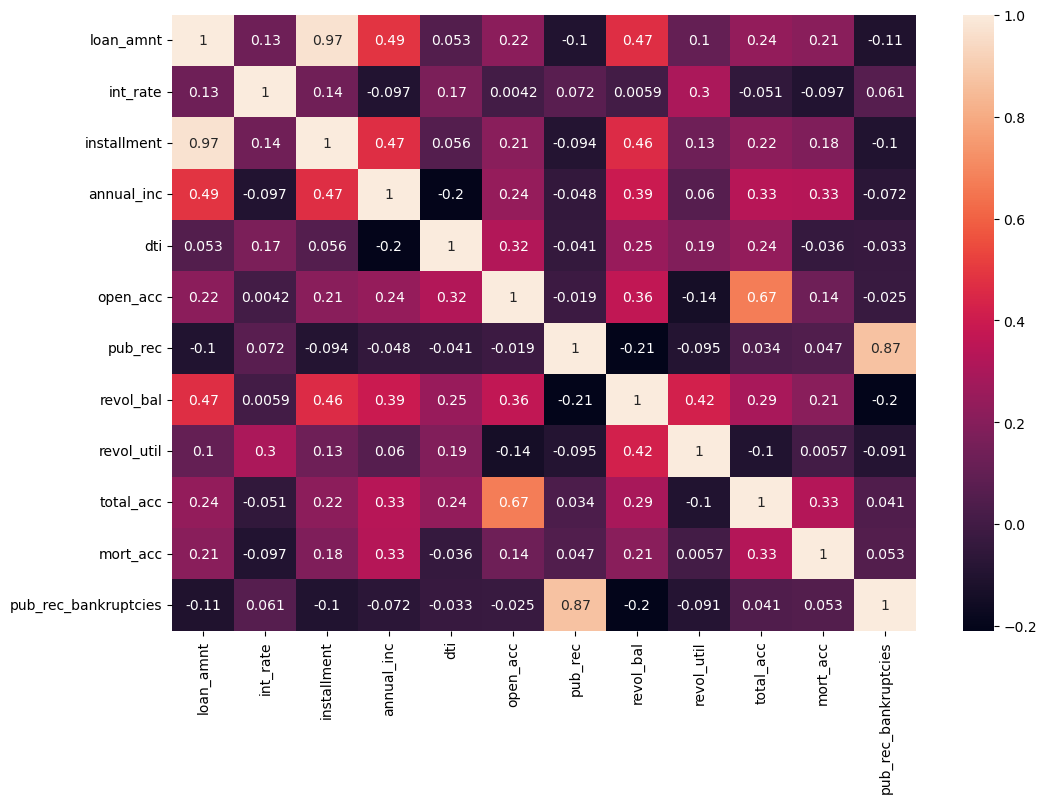

In [25]:
plt.figure(figsize = (12, 8))
sns.heatmap(loan.corr(method = 'spearman'), annot = True)
plt.show()


    Comments -
    
        From above heatmap, 
        
        Loan amount and installment feature are highly correlated.
        

------------------------------------------------------------------------------------

**Data Cleaning & Pre-processing -**

    Check for Missing values & Duplicates.
    



In [26]:
# Missing value check -
round((loan.isnull().sum() * 100) / (len(loan)),2)


loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

    As we have null values less than 10%. we can just drop them which will not create any impact on further analysis.
    

In [27]:
loan = loan.dropna()

round((loan.isnull().sum() * 100) / (len(loan)),2)


loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

-----------------------------------------------------------------------------------------------------------------

In [28]:
# Duplicate value check -
loan[loan.duplicated()]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


    No duplicate values present in the given dataset.


In [29]:
loan.shape


(335868, 27)

--------------------------------------------------------------------------------------------------------

**Outlier Treatment -**

In [30]:
numerical_column = loan.select_dtypes(include='number')
num_cols = numerical_column.columns
len(num_cols)

loan_1 = loan.copy()


In [31]:
for col in num_cols:
    mean = loan_1[col].mean()
    std = loan_1[col].std()
    
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    
    loan_1 = loan_1[(loan_1[col] < upper_limit) & (loan_1[col] > lower_limit)]
    
loan_1.shape  # We have created another dataframe to perform further model building & analysis.


(318381, 27)

In [32]:
loan.shape


(335868, 27)

--------------------------------------------------------------------------------------

**Feature Engineering -**


In [33]:
# for address column we will consider the distric and its pincode -
loan_1['ad_code'] = loan_1['address'].apply(lambda x : (re.findall('[A-Z]{2} [0-9]{5}' ,str(x)))[0])
loan_1['ad_diccode'] = loan_1['ad_code'].apply(lambda x : (str(x)).split(' ')[0])
loan_1['ad_dicpin'] = loan_1['ad_code'].apply(lambda x : (str(x)).split(' ')[1])
loan_1.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,ad_code,ad_diccode,ad_dicpin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",OK 22690,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",SD 05113,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",WV 05113,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",MA 00813,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",VA 11650,VA,11650


In [34]:
# As we have splitted address column -
loan_1 = loan_1.drop(columns = ['address' , 'ad_code'], axis = 1)


In [35]:
# We will split issue column into month and year -
loan_1['issue_month'] = loan_1['issue_d'].apply(lambda x : str(x).split('-')[0])
loan_1['issue_year'] = loan_1['issue_d'].apply(lambda x : str(x).split('-')[1])


In [36]:
# We will also split earliest cr line column into month and year -
loan_1['earliest_cr_line_month'] = loan_1['earliest_cr_line'].apply(lambda x : str(x).split('-')[0])
loan_1['earliest_cr_line_year'] = loan_1['earliest_cr_line'].apply(lambda x : str(x).split('-')[1])


In [37]:
# Dropping earliest cr line column -
loan_1 = loan_1.drop(columns = ['earliest_cr_line'], axis = 1)


In [38]:
# Dropping issue column -
loan_1 = loan_1.drop(columns = ['issue_d'], axis = 1)


In [39]:
# Dropping title column -
loan_1 = loan_1.drop(columns=['title'], axis=1)


------------------------------------------------------------------------------------------------------------

**Data Preparation for modeling -**


    As we can see, we have lot of categorical data which needs to be converted into numerical feature, 
    
    so that we can build logistic regression model on the top of that.
    

In [40]:
for col in loan_1.columns:
  print(col, '->', loan_1[col].nunique())


loan_amnt -> 1370
term -> 2
int_rate -> 241
installment -> 47203
grade -> 7
sub_grade -> 35
emp_title -> 145036
emp_length -> 11
home_ownership -> 4
annual_inc -> 20157
verification_status -> 3
loan_status -> 2
purpose -> 13
dti -> 4047
open_acc -> 27
pub_rec -> 2
revol_bal -> 46984
revol_util -> 1135
total_acc -> 58
initial_list_status -> 2
application_type -> 3
mort_acc -> 2
pub_rec_bankruptcies -> 2
ad_diccode -> 54
ad_dicpin -> 10
issue_month -> 5
issue_year -> 12
earliest_cr_line_month -> 64
earliest_cr_line_year -> 12


**Label & Target Encoding -**


In [41]:
# Encoding categorical columns (Label Encoding) -
le = LabelEncoder() 

loan_1['term'] = le.fit_transform(loan_1['term'])

loan_1['grade'] = le.fit_transform(loan_1['grade'])

loan_1['sub_grade'] = le.fit_transform(loan_1['sub_grade'])

loan_1['emp_length'] = le.fit_transform(loan_1['emp_length'])

loan_1['home_ownership'] = le.fit_transform(loan_1['home_ownership'])

loan_1['verification_status'] = le.fit_transform(loan_1['verification_status'])

loan_1['loan_status'] = le.fit_transform(loan_1['loan_status'])

loan_1['purpose'] = le.fit_transform(loan_1['purpose'])

loan_1['pub_rec'] = le.fit_transform(loan_1['pub_rec'])

loan_1['initial_list_status'] = le.fit_transform(loan_1['initial_list_status'])

loan_1['application_type'] = le.fit_transform(loan_1['application_type'])

loan_1['mort_acc'] = le.fit_transform(loan_1['mort_acc'])

loan_1['pub_rec_bankruptcies'] = le.fit_transform(loan_1['pub_rec_bankruptcies'])

loan_1['ad_diccode'] = le.fit_transform(loan_1['ad_diccode'])

loan_1['ad_dicpin'] = le.fit_transform(loan_1['ad_dicpin'])

loan_1['open_acc'] = le.fit_transform(loan_1['open_acc'])

loan_1['issue_month'] = le.fit_transform(loan_1['issue_month'])

loan_1['issue_year'] = le.fit_transform(loan_1['issue_year'])

loan_1['earliest_cr_line_month'] = le.fit_transform(loan_1['earliest_cr_line_month'])

loan_1['earliest_cr_line_year'] = le.fit_transform(loan_1['earliest_cr_line_year'])


    Only "emp_title" column is categorical in nature.
    
    So we will use target encoding.
    

In [42]:
# Target Encoding -

df = pd.DataFrame({'emp_title' : loan_1['emp_title'], 'target' : loan_1['loan_status']})

target_mean = df.groupby(by = ['emp_title'])['target'].mean()

loan_1['emp_title'] = df['emp_title'].map(target_mean)

loan_1.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,329.48,1,8,0.756098,1,3,117000.0,...,1,1,0,0,39,3,3,0,40,5
1,8000.0,0,11.99,265.68,1,9,0.666667,4,0,65000.0,...,0,1,1,0,44,1,3,0,54,6
2,15600.0,0,10.49,506.97,1,7,0.888889,10,3,43057.0,...,0,1,0,0,52,1,3,0,57,7
3,7200.0,0,6.49,220.65,0,1,1.000000,6,3,54000.0,...,0,1,0,0,22,0,2,10,56,8
4,24375.0,1,17.27,609.33,2,14,0.000000,9,0,55000.0,...,0,1,1,0,48,2,1,3,49,2


**Standardization of data:-**

    

In [43]:
X = loan_1[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'ad_diccode', 'ad_dicpin', 'issue_month',
       'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year']]

y = loan_1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((254704, 28), (63677, 28), (254704,), (63677,))

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


------------------------------------------------------------------------------------------------------

**Model Building (Logistic regression) -**


In [45]:
# Model Building -
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [46]:
model.score(X_test, y_test)


0.9041883254550308

    Comments -
    
        Logistic regression testing model accuracy is 90%.
        

In [47]:
# Model Coefficients -
dic = {}
for coef, col in zip(model.coef_[0], loan_1.columns):
  dic[col] = abs(coef)
a = sorted(dic.items(), key = lambda x: (x[1], x[0]))
for i in a:
  print(i)


('loan_status', 0.013106738579971597)
('earliest_cr_line_month', 0.03411829188199695)
('annual_inc', 0.03627901195929432)
('pub_rec_bankruptcies', 0.04385503409571983)
('total_acc', 0.06006001331343153)
('verification_status', 0.0664236496318211)
('application_type', 0.06992049215674233)
('grade', 0.07829483337603647)
('emp_length', 0.11650771695548919)
('ad_dicpin', 0.12540036339819177)
('open_acc', 0.1352701293829918)
('issue_month', 0.16088754647957262)
('issue_year', 0.1617502317037262)
('mort_acc', 0.20532256714701755)
('loan_amnt', 0.25739658945303995)
('home_ownership', 0.2968806547836286)
('pub_rec', 0.4811468801762417)
('revol_util', 0.5180648133327687)
('term', 0.5508819928928224)
('revol_bal', 0.7542194182126563)
('installment', 0.800874392822073)
('dti', 0.9103136133440318)
('initial_list_status', 0.9474534861864589)
('purpose', 1.0653462777202714)
('ad_diccode', 3.493191384500606)
('int_rate', 3.8550746813581314)
('sub_grade', 6.182169868291752)
('emp_title', 8.85245878206

    Comments -
    
        from this we can see that 
        
            column "issue_year" has a very less effect as per the coefficient value,
        
            and column "emp_title" is having high impact as per the coefficient value. 
            

**Result Evaluation -**
    
        Checking for 
        
            1) Classification report (Confusion Matrix)
            
            2) ROC-AUC Curve
            
            3) Precision recall curve
            

    1) Classification Report -
    

In [48]:
# Classification report & Confusion matrix -
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix - \n\n', cm)
print('\nf1 score', f1_score(y_test, y_pred))


Confusion Matrix - 

 [[ 7945  4561]
 [ 1540 49631]]

f1 score 0.9420954224917666


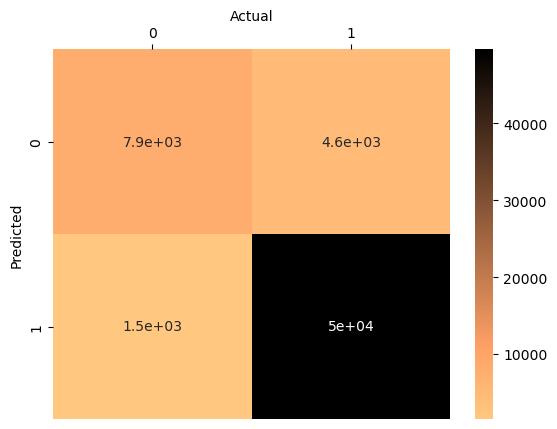

In [49]:
# Confusion Matrix -
ax = sns.heatmap(cm, annot = True, cmap = "copper_r")
ax.set(xlabel = "Actual", ylabel = "Predicted")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()


In [50]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.64      0.72     12506
           1       0.92      0.97      0.94     51171

    accuracy                           0.90     63677
   macro avg       0.88      0.80      0.83     63677
weighted avg       0.90      0.90      0.90     63677



    Comments -
    
        from this we can see that the Precision towords 1 is very good and 0 is also good
        
        but on the other hand Recall towards 1 is very good and 0 is average
        
        f1 score towards 1 is very good and 0 is nearly good.

        This is because we have imbalance data problem.
        
        So, we can solve this imbalance data problem by using SMOTE Technique.
        

    2) AUC-ROC Curve -
    

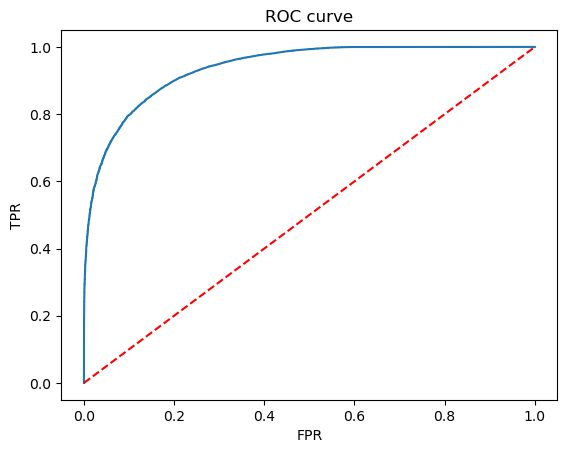

In [51]:
prob = (model.predict_proba(X_test))[:,1]
fpr, tpr, thr = roc_curve(y_test, prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [52]:
roc_auc_score(y_test,prob)


0.9384491945790938

    Comments -
    
        By looking at AUC-ROC curve & auc score, we can say that our model performance is better.
        

    3) Precision Recall Curve -
    

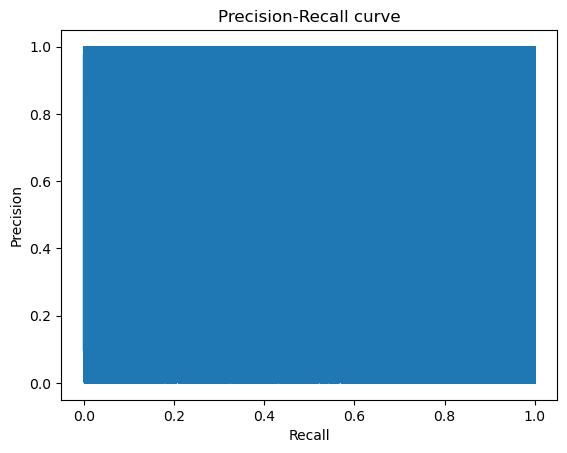

In [53]:
precision, recall, thr = precision_recall_curve(y_test, prob)
plt.plot(recall[:-1], prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [54]:
auc(recall, precision)


0.9830068273323437

    Comments -
    
        Precision- Recall curve also shows that our model performance is good.
        

    Note -
    
        We haven't perform any method to handle imbalance data probelm, still we are getting good results.
        
        But, it is always a recommendation to use SMOTE and other techniques to handle imbalance data problem, 
        
        otherwise our model will not reliable to interprete the better results.
        

-----------------------------------------------------------------------------------------------------------

**Tradeoff Questions -**

    Q.How can we make sure that our model can detect real defaulters and there are less false positives? 
    
    This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
    
    Ans - 
    
        1) When creating a model, oversampling techniques like SMOTE should be employed to maintain 
        
           a very low number of False Positives. 
        
           More sophisticated algorithms like SVM, Decision-Trees, Random Forest, 
        
           and different hyperparameter tuning can also be used.

        2) The data shows that the percentage of defaulters is marginally higher than in the banking sector.


    

-----------------------------------------------------------------------------------------------------------

    Q. Since NPA (non-performing asset) is a real problem in this industry, 
    
    it’s important we play safe and shouldn’t disburse loans to anyone. 
    
    Ans -
    
        1) Indeed. Not every borrower should receive a loan from LoanTap. 
        
           Internal policies and analysis should be in place at the company to determine who the right people are. 
        
           Approximately 20% of borrowers default on their loans, which results in non-performing assets (NPAs) 
        
           for the lender.

        2) Low False positive indicates that a high Precision model should be built. 
        
           If we maintain a high threshold value in the logistic regression model, we can do this.

        3) However, if threshold levels are kept too high, False Negatives will rise. 
        
           Chances may be lost as a result of this incident. 
        
           In this instance, we will not extend credit to borrowers who, according to our model, will not default. 
        
        

------------------------------------------------------------------------------------------------

**Actionable Insights & Recommendations -**


    >> Insights -
    
    
            1) Approximately 80.26% of clients have settled their loan balance in full. 20% or less are defaulters. 

               From the standpoint of the personal lending industry, this ratio is high. 

               The 20% will go toward LoanTap's non-performing assets.


            2) Overall Statistics of the Model:

                a. Accuracy = 90%
                b. Precision = 92
                c. Recall = 97
                d. F1 -score = 94%


            3) Features which have significant impact on outcome are as follow:

                a. Employee title
                b. Loan sub grade
                c. Interest rate
                d. pincode (from address)
                e. purpose
                f. dti (debt to income ratio)


            4) application_type JOINT has positive Coefficient.


            5) emp_title Project Manager has positive Coefficient.



    >> Recommendations -


            1) LoanTap should impose more strict regulations to lower this percentage to 5% to 6% in order to lower 

               the risk of non-performing assets. Compared to other banks, LoanTap should offer loans at a little higher 

               interest rate. This will reduce the risks associated with defaulters and keep the company profitable.


            2) LoanTap could concentrate more on loans with shorter terms (36 months, for example).


            3) LoanTap should incorporate market segmentation based on pincodes.


            4) People may be encouraged to apply for combined loans by LoanTap. 

               As a result, the defaulter count will get reduced.


            5) LoanTap should continue only providing loans for traditional needs like marriage, a car, etc.


            6) Depending on a person's employment title, LoanTap may also choose to advertise on social media.

    
    

----------------------------------------------------------------------------------------------------

**Questionnaire :-**


        Q.1 What percentage of customers have fully paid their Loan Amount?
        
        Ans - Around 80.38% of customers have fully paid their Loan Amount.
        
        
        
        Q.2 Comment about the correlation between Loan Amount and Installment features.
        
        Ans - There is very high co-relation between loan amount and installment. pearson co-efficient is nearly 0.97. 
        
              This indicates high multi-collinearity between these two features.
                      
                      
                      
        Q.3 The majority of people have home ownership as _______.
        
        Ans - Mortgage (50%)
        
        
        
        Q.4 People with grades ‘A’ are more likely to fully pay their loan. (T/F)
        
        Ans - True. Out of all people with grade 'A',  nearly 93% got their loan approved.
        
        
        
        
        Q.5 Name the top 2 afforded job titles.
        
        Ans - Teacher & Manager.
        
        
        
        Q.6 Thinking from a bank's perspective, which metric should our primary focus be on..
            a. ROC AUC
            b. Precision
            c. Recall
            d. F1 Score
        
        Ans - As we need to give importance to both precision and recall. 
        
              We don't want to miss potential customers and at the same time we also don't want to give loan 
              
              to defaulters.
              
        
        
        Q.7 How does the gap in precision and recall affect the bank?
        
        Ans - Recall score: 0.98 and Precision score: 0.81. 
        
              which tells us that there are more false positives than the false negatives. 

              If Recall value is low,  it means Bank is loosing in opportunity cost.

              If Precision value is low, it means Bank's NPA (defaulters) may increase.
              
        


        
        Q.8 Which were the features that heavily affected the outcome?
        
        Ans - The features having higher weight are impacting more on target variable. 
        
              Following are such features which are heavily impacting the outcome -
                  
                  1) Employee title
                  
                  2) Loan sub grade
                  
                  3) Interest rate
                  
                  4) pincode (from address)
                  
                  5) purpose
                  
                  6) dti (debt to income ratio
         
        
        
        Q.9 Will the results be affected by geographical location? (Yes/No)
        
        Ans - Yes. Geographical location is important feature as weight of this feature is significantly higher.


